In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
crime = pd.read_excel('new_york_crime_by_city_2013.xls')
df_crime = pd.DataFrame.from_dict(crime)
df_crime = df_crime.drop('Rape\n(revised\ndefinition)1', 1)
df_crime.columns = ['City', 'Population', 'Violent_Crime', 'Murder', 'Rape', 'Robbery', 'Aggravated_Assault',
                   'Property_Crime', 'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson']

In [25]:
df_crime.sort_values(by = 'Population', ascending = False)

#print(df_crime.columns)

,City,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,population^2,Murder_Feature,Robbery_Feature,Major_City
216,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN,7.049493e+13,1,1,1
35,Buffalo,258789.0,3249.0,47.0,145.0,1322.0,1735.0,12491.0,3458.0,8076.0,957.0,NaN,6.697175e+10,1,1,1
272,Rochester,210562.0,2107.0,42.0,92.0,918.0,1055.0,10051.0,2587.0,6855.0,609.0,132.0,4.433636e+10,1,1,1
346,Yonkers,199134.0,1036.0,6.0,25.0,390.0,615.0,2368.0,470.0,1662.0,236.0,10.0,3.965435e+10,1,1,1
310,Syracuse,143834.0,1192.0,21.0,75.0,400.0,696.0,6473.0,1781.0,4298.0,394.0,57.0,2.068822e+10,1,1,1
7,Amherst Town,118296.0,107.0,1.0,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0,1.399394e+10,1,1,1
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1,1
126,Greece Town,96667.0,151.0,0.0,9.0,60.0,82.0,2303.0,332.0,1925.0,46.0,NaN,9.344509e+09,0,1,1
267,Ramapo Town,87204.0,57.0,2.0,5.0,9.0,41.0,567.0,88.0,466.0,13.0,NaN,7.604538e+09,1,1,1
57,Clarkstown Town,80705.0,65.0,0.0,8.0,17.0,40.0,1515.0,99.0,1388.0,28.0,NaN,6.513297e+09,0,1,1


In [4]:
#creating a squared column for population
df_crime['population^2'] = (df_crime['Population']**2)

#creating a binary column for murder
df_crime['Murder_Feature'] = 0
df_crime.loc[
    (df_crime['Murder'] > 0),
    'Murder_Feature'
] = 1

#creating a binary column for robbery
df_crime['Robbery_Feature'] = 0
df_crime.loc[
    (df_crime.Robbery > 0),
    'Robbery_Feature'
] = 1

#creating my own feature called to help view data without huge outliers
df_crime['Major_City'] = 0
df_crime.loc[
    (df_crime.Population >= 50000),
    'Major_City'
] = 1

#creating a copy dataframe with all of the same data but excluding New York City(a major outlier)
df_crime_noNYC = df_crime.loc[
    (df_crime.City != 'New York'),
    :
]

In [11]:
df_crime.groupby('Major_City')['Property_Crime'].mean()

Major_City
0     224.415902
1    9640.142857
Name: Property_Crime, dtype: float64

In [6]:
df_crime.head()

,City,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,population^2,Murder_Feature,Robbery_Feature,Major_City
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0,0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0,0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0,0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1,1
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,0,1,0


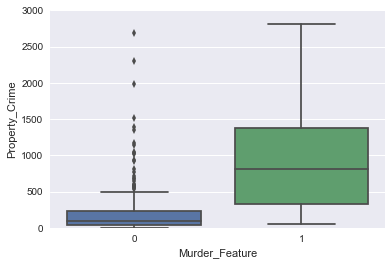

In [7]:
# boxplot showing the property crime distirbution based on the Murder Feature
plt.ylim(0, 3000)
sns.boxplot(y = 'Property_Crime', x = 'Murder_Feature', data = df_crime_noNYC)

It looks like property crime is significantly more probable/common when a town's crimes include murder

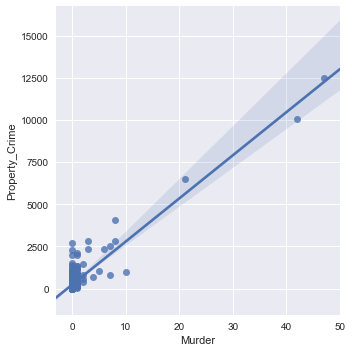

In [8]:
# plotting the murder rate against property crime rate
sns.lmplot('Murder', 'Property_Crime', data = df_crime_noNYC)

Since the x and y axis are not to scale I'm not sure if interpreting the strong slope visually means anything. I wish there was a way to have the lmplot also output the equation it came up with.

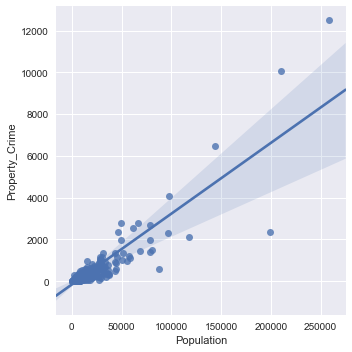

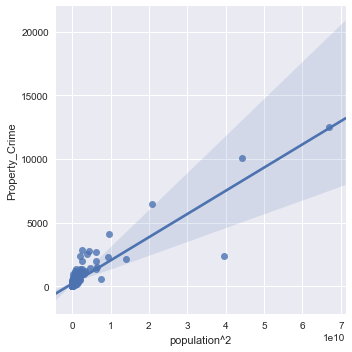

In [23]:
#Plotting both population and population squared against the property crime rate
sns.lmplot('Population', 'Property_Crime', data = df_crime_noNYC)
sns.lmplot('population^2', 'Property_Crime', data = df_crime_noNYC)
plt.show()

Logically speaking the bottom graph should have a shallower slope but there does not seem like a good way to plot this.

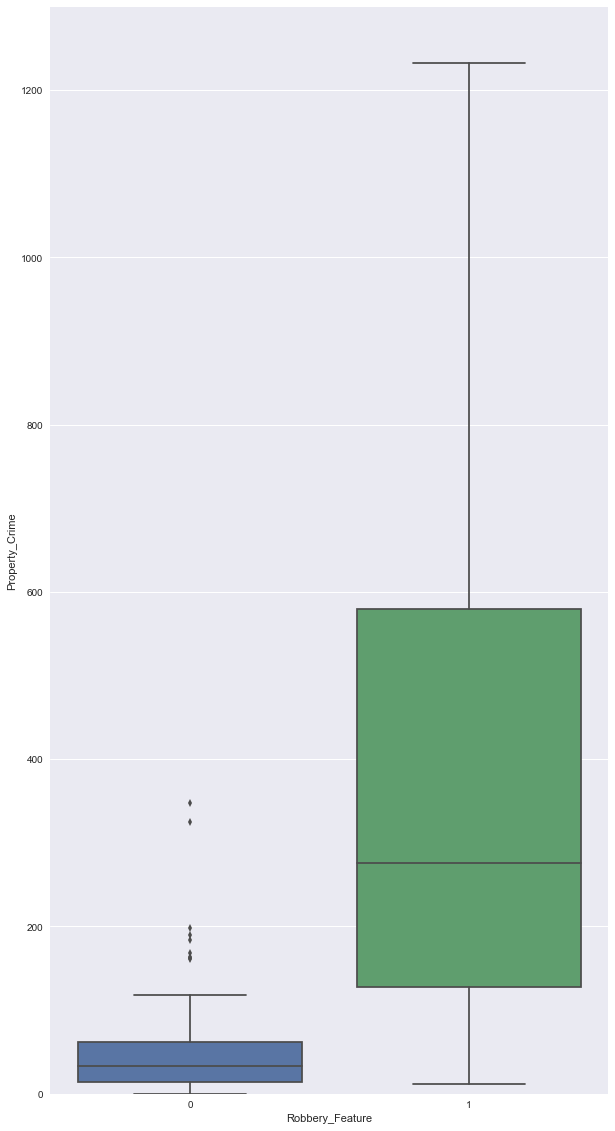

In [21]:
#Plotting distribution of property crime against the robbery feature
plt.figure(figsize = (10, 20))
plt.ylim(0,1300)
sns.boxplot(x = 'Robbery_Feature', y = 'Property_Crime', data = df_crime_noNYC)

This plot would be a lot easier to see if I could turn it on its side but switching x and y do not have that effect.

## Data Issues

The main thing is going to be dealing with outliers and the main outlier for all of them is New York City. It skews everything. I created a dataframe just for that purpose and it worked better but it is still being skewed high on counts because of some of the major cities. A second dataframe might be worth it similar to the 'Major City' feature I created that only contains those types of cities. That would provide much cleaner analysis of crimes.

Truth be told I think it would be extremely difficult to model all of these cities into one model, but rather than writing multiple models perhaps you could have a tier system. Since NYC is out you will only need four tiers. A Tier 1 city could be the major cities below(population range 100k or above). A Tier 2 city would range from that 95th percentile mark up to the 100k mark in population and encompass the rest of the outliers. Tier 3 cities would be from the Median to the 95th percentile mark and Tier 4 would be every city below the Median. 

So instead of building separate models the Tier system would provide a number that the model could incorporate into the equation that would alter probabilities of Murder and Robbery features.

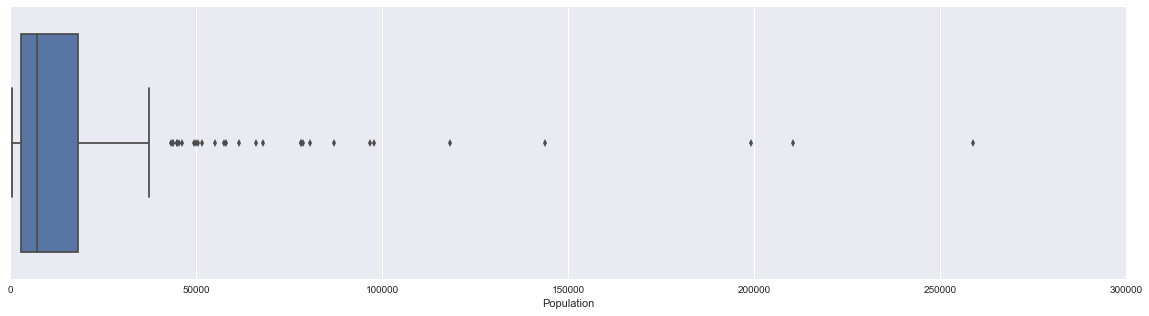

In [43]:
plt.figure(figsize = (20, 5))
plt.xlim(-5,300000)
sns.boxplot(x = 'Population', data = df_crime_noNYC)